In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
data_filepath = "results/retrieval_result_scores_s10_k3.csv"
data = pd.read_csv(data_filepath)
# drop retrieved_document_ids
data = data.drop(columns=["retrieved_document_ids"])

In [8]:
data

,pipeline_weight,query_id,binary_at_k,rank_score
0,0.0,32942903_0,0,0.200000
1,0.0,34050339_0,1,1.000000
2,0.0,36238668_1,1,1.000000
3,0.0,37177696_0,1,1.000000
4,0.0,32570213_0,0,0.250000
...,...,...,...,...
11734,1.0,34689624_0,1,0.500000
11735,1.0,34847061_0,0,0.166667
11736,1.0,30088136_1,1,0.333333
11737,1.0,35923956_1,1,1.000000


In [21]:
grouped_data = data.groupby('pipeline_weight')[['binary_at_k', 'rank_score']].mean().reset_index()
grouped_data

,pipeline_weight,binary_at_k,rank_score
0,0.00,0.275492,0.249903
1,0.05,0.805009,0.755562
2,0.10,0.805009,0.755622
3,0.15,0.805009,0.755622
4,0.20,0.805009,0.755711
5,0.25,0.806798,0.756158
6,0.30,0.806798,0.756178
7,0.35,0.806798,0.756235
8,0.40,0.806798,0.756427
9,0.45,0.808587,0.756874


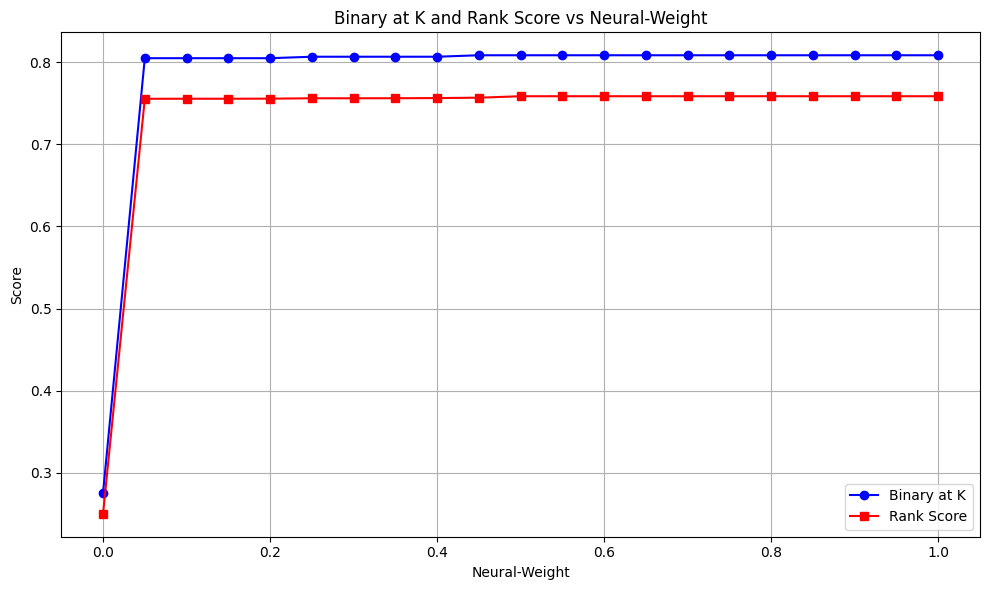

In [28]:
# Plotting
plt.figure(figsize=(10, 6))

# Plotting both Binary at K and Rank Score on the same plot
plt.plot(grouped_data['pipeline_weight'], grouped_data['binary_at_k'], marker='o', linestyle='-', color='blue', label='Binary at K')
plt.plot(grouped_data['pipeline_weight'], grouped_data['rank_score'], marker='s', linestyle='-', color='red', label='Rank Score')

plt.title('Binary at K and Rank Score vs Neural-Weight')
plt.xlabel('Neural-Weight')
plt.ylabel('Score')
plt.grid(True)
plt.legend()

plt.tight_layout()
# save to file
plt.savefig("results/retrieval_result_scores_s10_k3.png")
plt.show() 